In [5]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [6]:
epochs = 3

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(y_train), len(y_test)

(60000, 10000)

mlp linear

In [9]:
x_train = x_train.reshape(-1, 784) / 255.0 # scale ni 255 bdg. huvaasnaar 0-ees 1 utgatai boln
x_test = x_test.reshape(-1, 784) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 25s 43ms/step - loss: 0.2576 - accuracy: 0.9227 - val_loss: 0.1230 - val_accuracy: 0.9612
Epoch 2/3
469/469 [==============================] - 21s 45ms/step - loss: 0.0948 - accuracy: 0.9706 - val_loss: 0.0937 - val_accuracy: 0.9711
Epoch 3/3
469/469 [==============================] - 23s 49ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0779 - val_accuracy: 0.9761


In [ ]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

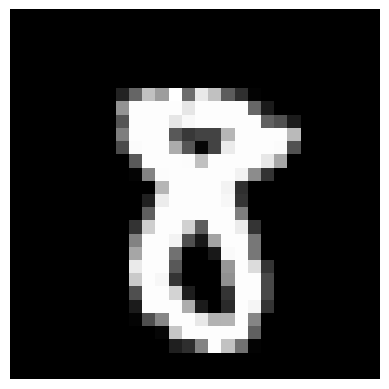

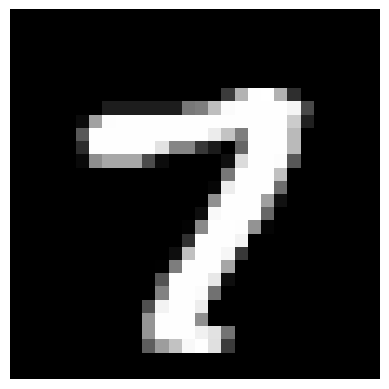

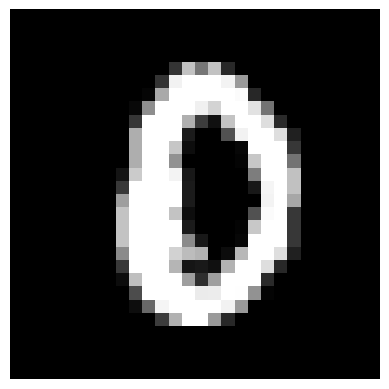

In [10]:
import os
from PIL import Image

(x_train, _), (_, _) = mnist.load_data()

rand = np.random.choice(len(x_train), size=3, replace=False)

for i, j in enumerate(rand):
    image = x_train[j]

    resize = np.array(Image.fromarray(image).resize((28, 28)))

    name = f'{i+1}.png'
    path = os.path.join('.', name)
    plt.imsave(path, resize, cmap='gray')

    plt.imshow(resize, cmap='gray')
    plt.axis('off')
    plt.show()

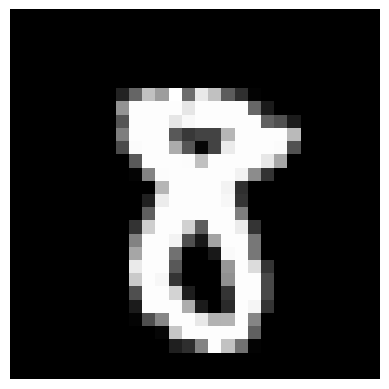

1/1 [==============================] - 1s 716ms/step
Predict 1.png: 8



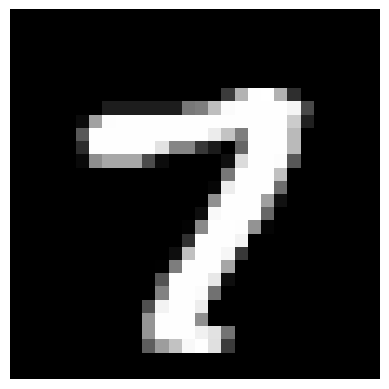

1/1 [==============================] - 0s 60ms/step
Predict 2.png: 7



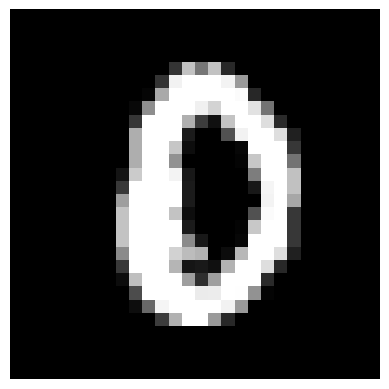

1/1 [==============================] - 0s 60ms/step
Predict 3.png: 0



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

files = [file for file in os.listdir('./') if file.endswith('.png')]

for image_file in files:
   
    img_path = os.path.join('./', image_file)

    img = Image.open(img_path).convert('L') 
    img_array = np.array(img)
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

    input_image = img_array.reshape(-1, 784) / 255.0
    predict = np.argmax(model1.predict(input_image))

    print(f"Predict {image_file}: {predict}\n")

In [12]:
model1.predict(input_image)

1/1 [==============================] - 0s 77ms/step


array([[9.9992621e-01, 3.1749505e-06, 4.3186345e-05, 1.8860958e-07,
        2.2020129e-06, 1.3863064e-07, 2.7677465e-06, 2.0754387e-06,
        8.8575653e-06, 1.1131108e-05]], dtype=float32)

cnn

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(49, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))



Epoch 1/3
469/469 [==============================] - 75s 155ms/step - loss: 0.2518 - accuracy: 0.9288 - val_loss: 0.0768 - val_accuracy: 0.9746
Epoch 2/3
469/469 [==============================] - 81s 173ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0521 - val_accuracy: 0.9828
Epoch 3/3
469/469 [==============================] - 98s 209ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.0379 - val_accuracy: 0.9877


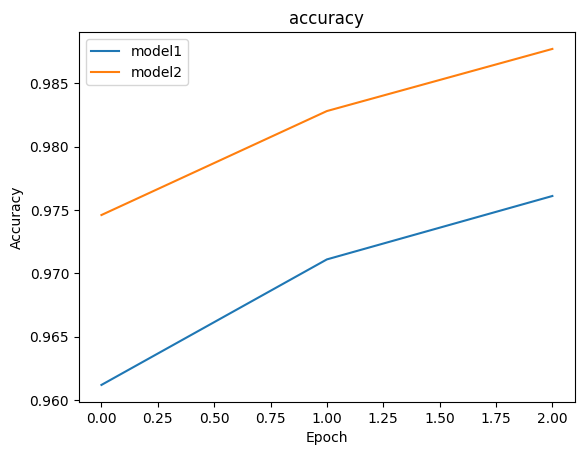

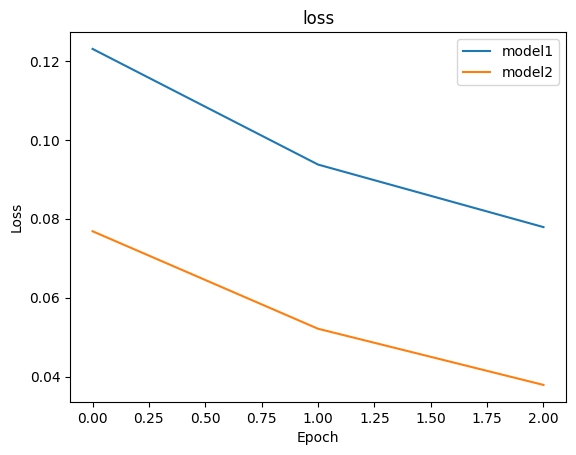

In [35]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['model1', 'model2'], loc='upper left')
plt.show()

plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['model1', 'model2'], loc='upper right')
plt.show()